# Question 3

- To compute the FFT of the entire signal, we use the numpy fourier transform function.

In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

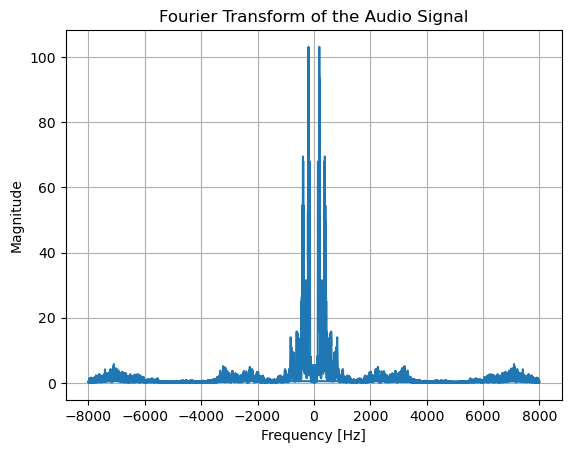

In [2]:
signal, fs = librosa.load("../audio/audio.wav", sr=None)  # sr=None to preserve the original sampling rate

fft = np.fft.fft(signal)

n = len(signal)
frequencies = np.fft.fftfreq(n, 1/fs)
magnitude = np.abs(fft)

plt.figure()
plt.plot(frequencies, magnitude)
plt.title('Fourier Transform of the Audio Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


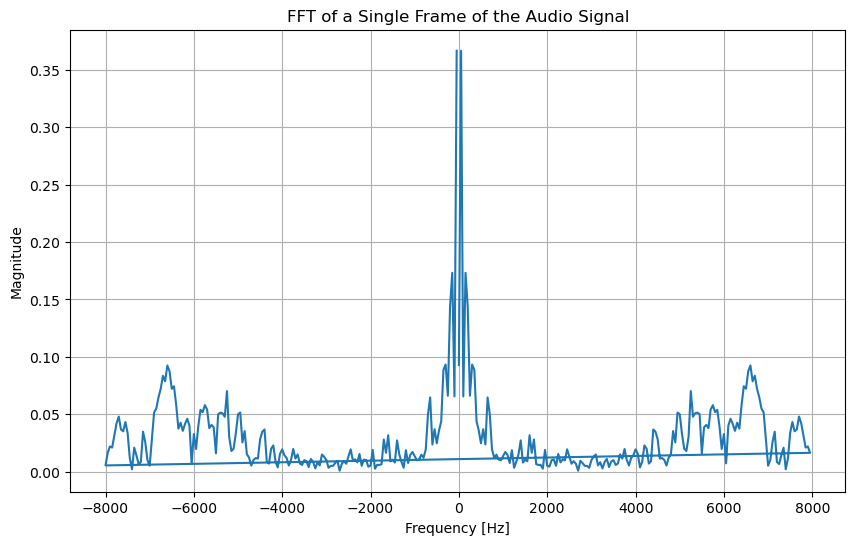

In [3]:
windowSize = int(0.02 * fs)
shiftSize = int(0.01 * fs)

frame_end = windowSize
frame = signal[0:frame_end]

fft_frame = np.fft.fft(frame)

n = len(frame) 
frequencies = np.fft.fftfreq(n, 1/fs) 

magnitude = np.abs(fft_frame)

plt.figure(figsize=(10, 6))
plt.plot(frequencies, magnitude)
plt.title('FFT of a Single Frame of the Audio Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


- to compute the STFT of the signal, we divide it into frames and then calculate the FFT in each frame.

In [4]:
def stft(signal, fs, frame_size, shift_size):
    signal = np.pad(signal, (0, frame_size - len(signal) % shift_size)) 
    num_frames = 1 + (len(signal) - frame_size) // shift_size

    stft = np.zeros((frame_size // 2 + 1, num_frames), dtype=np.complex64)

    for i in range(num_frames):
        start = i * shift_size
        end = start + frame_size
        frame = signal[start:end]
        fft_frame = np.fft.rfft(frame) 
        stft[:, i] = fft_frame

    return stft

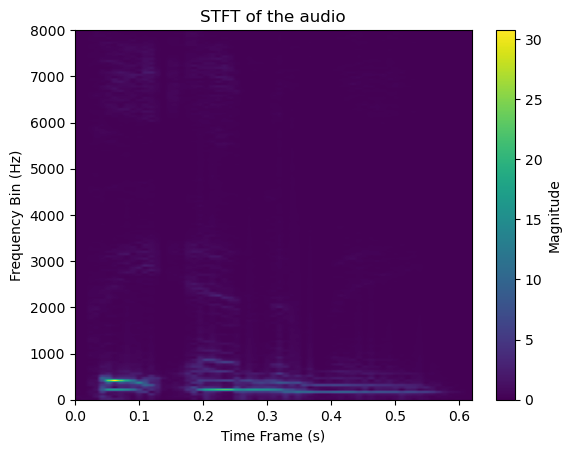

In [5]:
stftSig = stft(signal, fs, windowSize, shiftSize)
magnitude = np.abs(stftSig)
num_frames = 1 + (len(signal) - windowSize) // shiftSize

time = np.arange(num_frames) * shiftSize / fs 
freq = np.fft.rfftfreq(windowSize, 1 / fs)

plt.figure()
plt.imshow(magnitude, aspect='auto', origin='lower', cmap='viridis', extent=[time[0], time[-1], freq[0], freq[-1]])
plt.xlabel('Time Frame (s)')
plt.ylabel('Frequency Bin (Hz)')
plt.title(f'STFT of the audio')
plt.colorbar(label='Magnitude')
plt.show()

- Window sizes of different lengths are considered - [10,100,256,512] (keeping window shape as Hanning)
- Window types of different types are considered - [Hanning, Hamming, Bartlett, Blackman] (keeping the window size as 256)

In [6]:
def stft(signal, fs, frame_size, shift_size, window_shape):
    signal = np.pad(signal, (0, frame_size - len(signal) % shift_size)) 
    num_frames = 1 + (len(signal) - frame_size) // shift_size

    stft = np.zeros((frame_size // 2 + 1, num_frames), dtype=np.complex64)

    for i in range(num_frames):
        start = i * shift_size
        end = start + frame_size
        frame = signal[start:end]
        window = window_shape(end - start)
        frame *= window
        
        stft_frame = np.fft.rfft(frame) 
        stft[:, i] = stft_frame

    return stft        

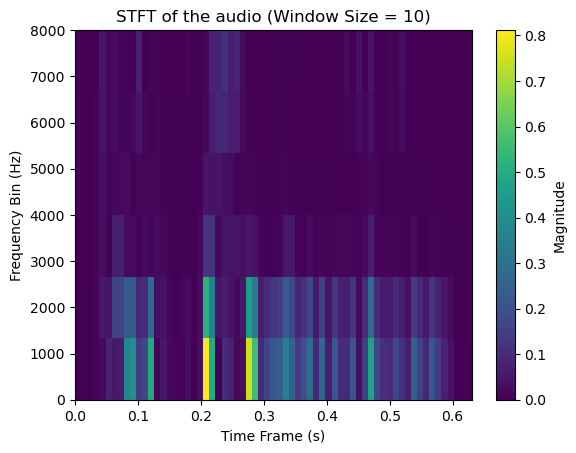

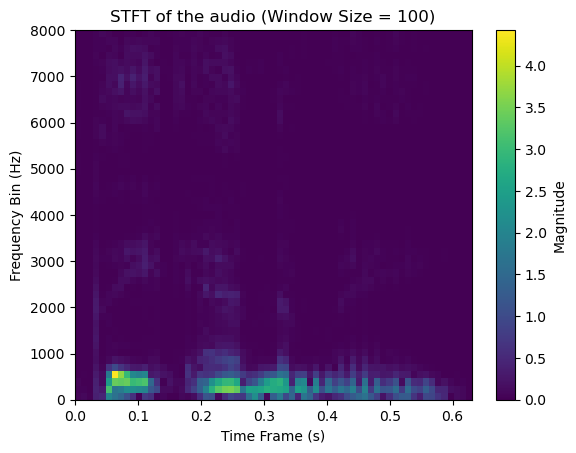

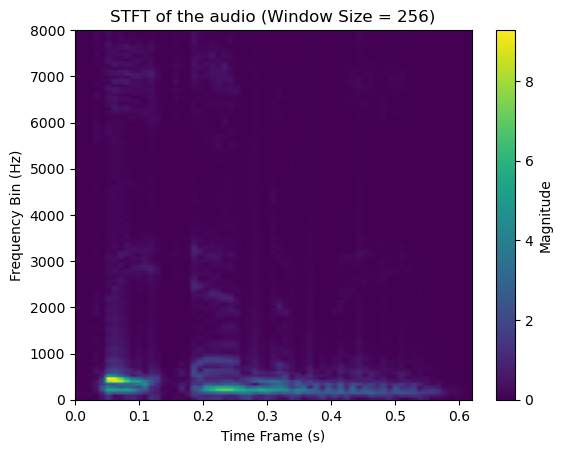

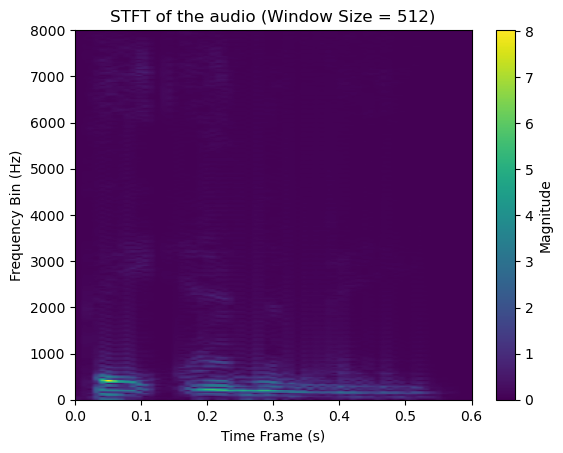

In [7]:
window_sizes = [10, 100, 256, 512]
window_shape = np.hanning

for window_size in window_sizes:
    stftSig = stft(signal, fs, window_size, shiftSize, window_shape)

    num_frames = 1 + (len(signal) - window_size) // shiftSize

    time = np.arange(num_frames) * shiftSize / fs 
    freq = np.fft.rfftfreq(window_size, 1 / fs)

    plt.figure()
    plt.imshow(np.abs(stftSig), aspect='auto', origin='lower', cmap='viridis', extent=[time[0], time[-1], freq[0], freq[-1]])
    plt.xlabel('Time Frame (s)')
    plt.ylabel('Frequency Bin (Hz)')
    plt.title(f'STFT of the audio (Window Size = {window_size})')
    plt.colorbar(label='Magnitude')
    plt.show()

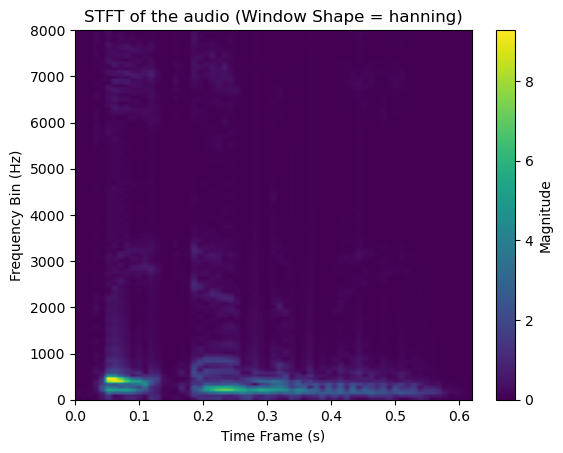

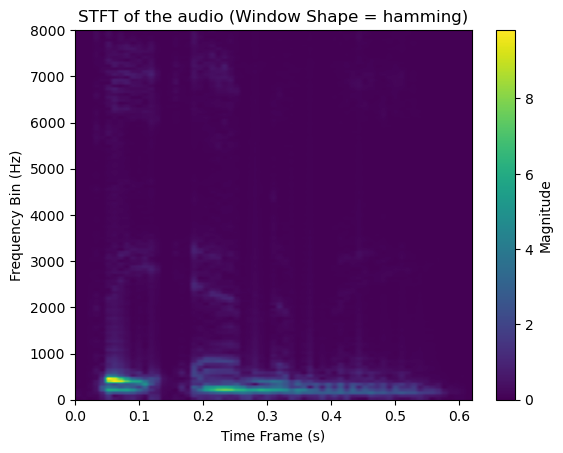

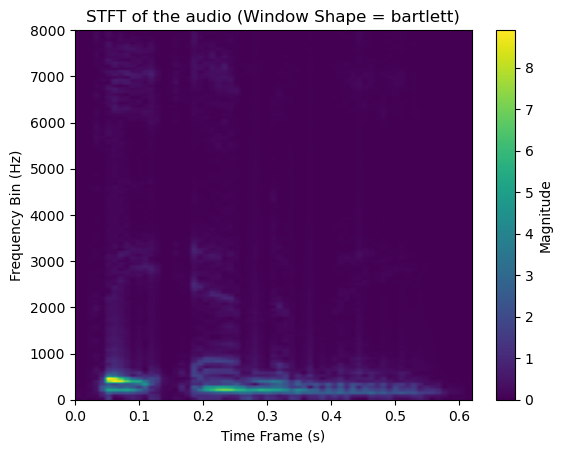

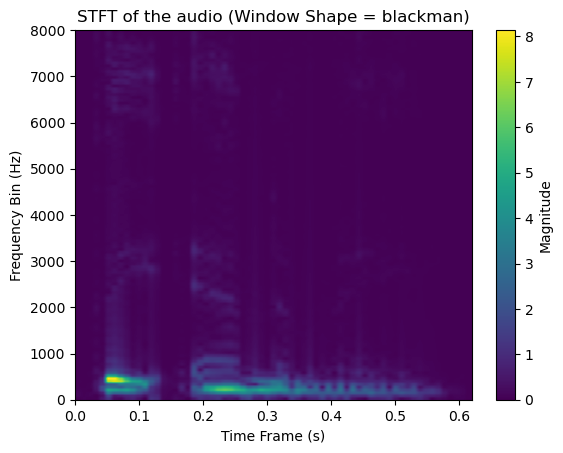

In [8]:
window_shapes = [np.hanning, np.hamming, np.bartlett, np.blackman]
window_size = 256

for window_shape in window_shapes:
    stftSig = stft(signal, fs, window_size, shiftSize, window_shape)

    num_frames = 1 + (len(signal) - window_size) // shiftSize

    time = np.arange(num_frames) * shiftSize / fs 
    freq = np.fft.rfftfreq(window_size, 1 / fs)

    plt.figure()
    plt.imshow(np.abs(stftSig), aspect='auto', origin='lower', cmap='viridis', extent=[time[0], time[-1], freq[0], freq[-1]])
    plt.xlabel('Time Frame (s)')
    plt.ylabel('Frequency Bin (Hz)')
    plt.title(f'STFT of the audio (Window Shape = {window_shape.__name__})')
    plt.colorbar(label='Magnitude')
    plt.show()